<a href="https://colab.research.google.com/github/aapolaivm/Google-Colab-algorithms/blob/main/Concolution_activationfunction_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2




# Testing SGD learning rate and momentum


170498071/170498071 [==============================] - 2s 0us/step
Training with learning rate=0.1, momentum=0.9
Epoch 1/20
391/391 - 6s - loss: 1.9813 - accuracy: 0.2668 - val_loss: 1.6802 - val_accuracy: 0.3904 - 6s/epoch - 16ms/step
Epoch 2/20
391/391 - 2s - loss: 1.6174 - accuracy: 0.4097 - val_loss: 1.5547 - val_accuracy: 0.4358 - 2s/epoch - 5ms/step
Epoch 3/20
391/391 - 3s - loss: 1.4994 - accuracy: 0.4653 - val_loss: 1.4903 - val_accuracy: 0.4760 - 3s/epoch - 7ms/step
Epoch 4/20
391/391 - 2s - loss: 1.3829 - accuracy: 0.5125 - val_loss: 1.4293 - val_accuracy: 0.4946 - 2s/epoch - 5ms/step
Epoch 5/20
391/391 - 2s - loss: 1.3058 - accuracy: 0.5430 - val_loss: 1.4094 - val_accuracy: 0.5050 - 2s/epoch - 5ms/step
Epoch 6/20
391/391 - 2s - loss: 1.2655 - accuracy: 0.5591 - val_loss: 1.3214 - val_accuracy: 0.5510 - 2s/epoch - 5ms/step
Epoch 7/20
391/391 - 2s - loss: 1.2095 - accuracy: 0.5794 - val_loss: 1.3371 - val_accuracy: 0.5338 - 2s/epoch - 4ms/step
Epoch 8/20
391/391 - 2s - loss: 

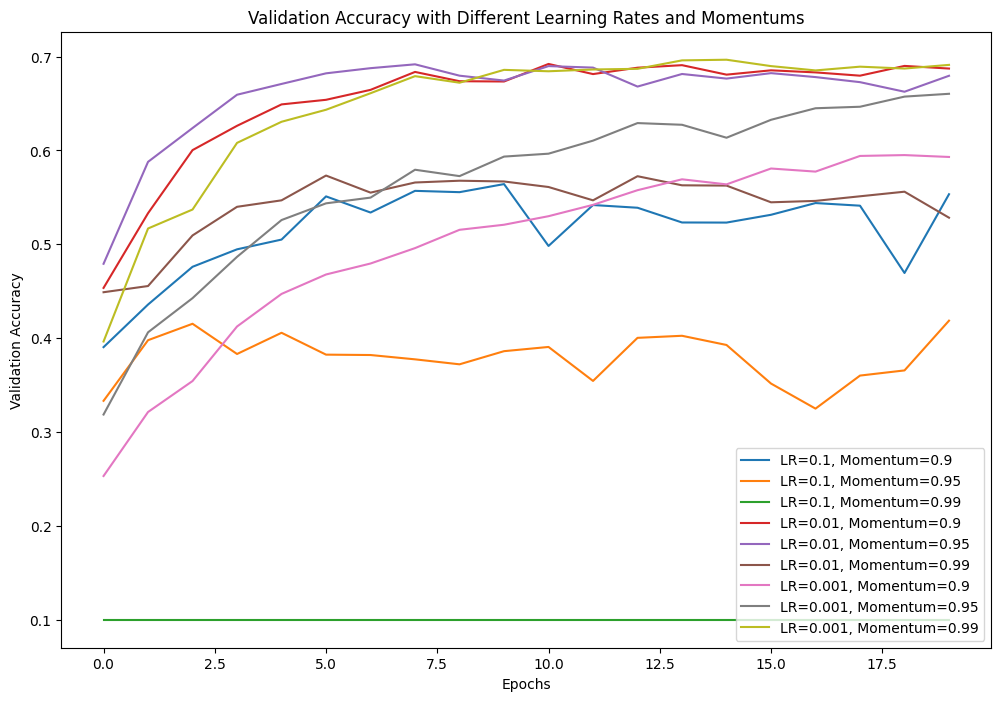

Best accuracy found: 0.6911 with LR=0.001 and Momentum=0.99


In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Define a function to build the CNN model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Function to train the model with different learning rates and momentums
def train_model(learning_rate, momentum):
    model = build_model()
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels), verbose=2)
    return history

# Define a set of learning rates and momentums to test
learning_rates = [0.1, 0.01, 0.001]
momentums = [0.9, 0.95, 0.99]

best_accuracy = 0.0
best_lr = None
best_momentum = None
best_history = None

plt.figure(figsize=(12, 8))

# Loop through different learning rates and momentums
for lr in learning_rates:
    for momentum in momentums:
        print(f"Training with learning rate={lr}, momentum={momentum}")
        history = train_model(lr, momentum)

        # Plotting validation accuracy for each set of parameters
        plt.plot(history.history['val_accuracy'], label=f'LR={lr}, Momentum={momentum}')

        # Find the best accuracy among all parameter sets
        if history.history['val_accuracy'][-1] > best_accuracy:
            best_accuracy = history.history['val_accuracy'][-1]
            best_lr = lr
            best_momentum = momentum
            best_history = history

plt.title('Validation Accuracy with Different Learning Rates and Momentums')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

print(f"Best accuracy found: {best_accuracy:.4f} with LR={best_lr} and Momentum={best_momentum}")


# Testing different optimizers

Training with optimizer: RMSprop
Epoch 1/20
391/391 - 4s - loss: 1.6923 - accuracy: 0.3942 - val_loss: 1.5025 - val_accuracy: 0.4603 - 4s/epoch - 10ms/step
Epoch 2/20
391/391 - 2s - loss: 1.3092 - accuracy: 0.5389 - val_loss: 1.2623 - val_accuracy: 0.5647 - 2s/epoch - 5ms/step
Epoch 3/20
391/391 - 2s - loss: 1.1201 - accuracy: 0.6097 - val_loss: 1.1729 - val_accuracy: 0.5788 - 2s/epoch - 5ms/step
Epoch 4/20
391/391 - 2s - loss: 1.0045 - accuracy: 0.6513 - val_loss: 0.9838 - val_accuracy: 0.6552 - 2s/epoch - 5ms/step
Epoch 5/20
391/391 - 3s - loss: 0.9147 - accuracy: 0.6836 - val_loss: 0.9555 - val_accuracy: 0.6705 - 3s/epoch - 7ms/step
Epoch 6/20
391/391 - 2s - loss: 0.8371 - accuracy: 0.7121 - val_loss: 0.9074 - val_accuracy: 0.6891 - 2s/epoch - 6ms/step
Epoch 7/20
391/391 - 2s - loss: 0.7648 - accuracy: 0.7369 - val_loss: 0.9439 - val_accuracy: 0.6782 - 2s/epoch - 5ms/step
Epoch 8/20
391/391 - 2s - loss: 0.6985 - accuracy: 0.7603 - val_loss: 0.9620 - val_accuracy: 0.6776 - 2s/epoch -

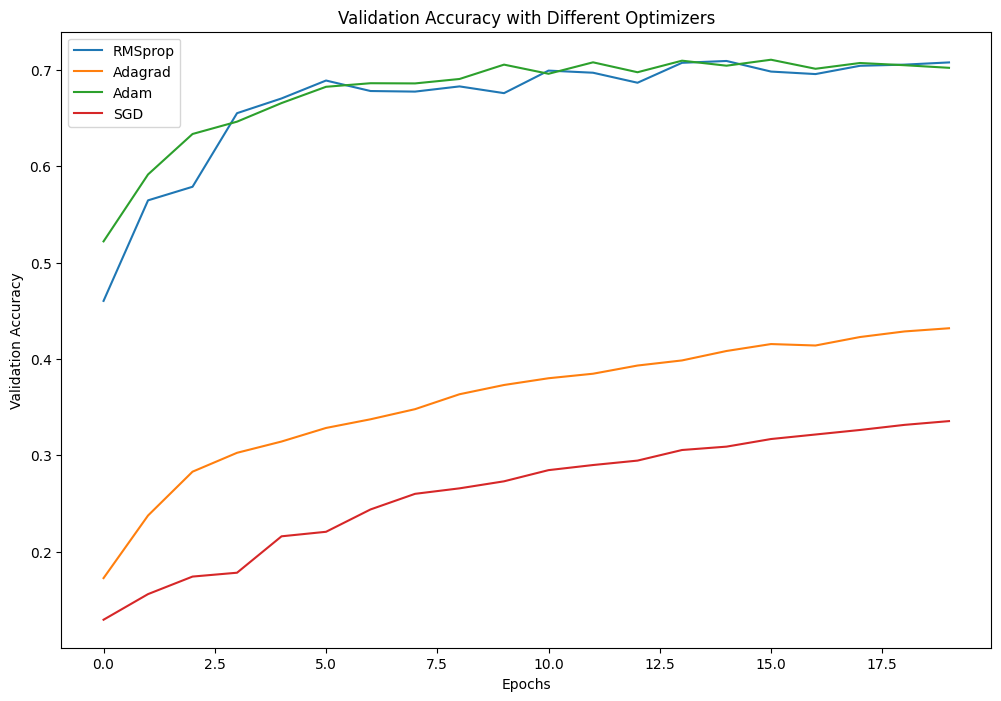

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop, Adagrad, Adam, SGD
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to range [0, 1]
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)

# Define a function to build the CNN model
def build_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Function to train the model with different optimizers and learning rates
def train_model(optimizer, learning_rate):
    model = build_model()
    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(train_images, train_labels, epochs=20, batch_size=128, validation_data=(test_images, test_labels), verbose=2)
    return history

# Define learning rates for all optimizers
learning_rate = 0.001

# Train models with different optimizers
optimizers = [RMSprop, Adagrad, Adam, SGD]
optimizer_names = ['RMSprop', 'Adagrad', 'Adam', 'SGD']

plt.figure(figsize=(12, 8))

for optimizer, opt_name in zip(optimizers, optimizer_names):
    print(f"Training with optimizer: {opt_name}")
    history = train_model(optimizer, learning_rate)

    # Plotting validation accuracy for each optimizer
    plt.plot(history.history['val_accuracy'], label=opt_name)

plt.title('Validation Accuracy with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()